In [4]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv('data/city_data.csv')
ride_data = pd.read_csv('data/ride_data.csv')

# Combine the data into a single dataset
combined_data = city_data.merge(ride_data)
#combined_data = pd.merge(city_data, ride_data, how = "right", on = ['city','city'])

# Display the data table for preview
combined_data.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [5]:
# Build dataframes
urban = combined_data.loc[combined_data['type'] == 'Urban']
suburban = combined_data.loc[combined_data['type'] == 'Suburban']
rural = combined_data.loc[combined_data['type'] == 'Rural']

In [6]:
# Obtain the x and y coordinates for each of the three city types

urbanrides = urban['ride_id'].groupby(urban['city']).count()
suburbanrides = suburban['ride_id'].groupby(suburban['city']).count()
ruralrides = rural['ride_id'].groupby(rural['city']).count()

urbanfares = urban['fare'].groupby(urban['city']).mean()
suburbanfares = suburban['fare'].groupby(suburban['city']).mean()
ruralfares = rural['fare'].groupby(rural['city']).mean()

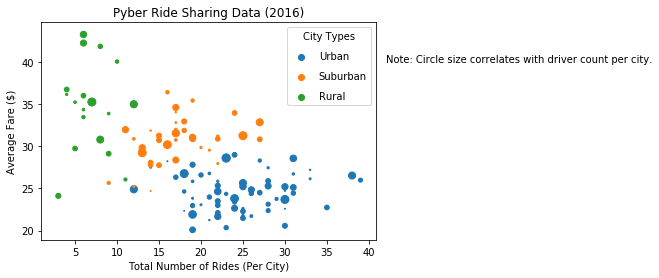

In [7]:
# Bubble size
citysize = combined_data['driver_count'].groupby(combined_data['city']).mean()

# Build the scatter plots for each city types
plt.scatter(urbanrides, urbanfares, citysize)
plt.scatter(suburbanrides, suburbanfares, citysize)
plt.scatter(ruralrides, ruralfares, citysize)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.text(42,40, 'Note: Circle size correlates with driver count per city.')

# Create a legend
labels = ['Urban', 'Suburban', 'Rural']
plt.legend(labels,
           #scatterpoints=1, 
           labelspacing=1, 
           title='City Types')

plt.show()

In [74]:
# Save Figure
plt.savefig('city_size.png')

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

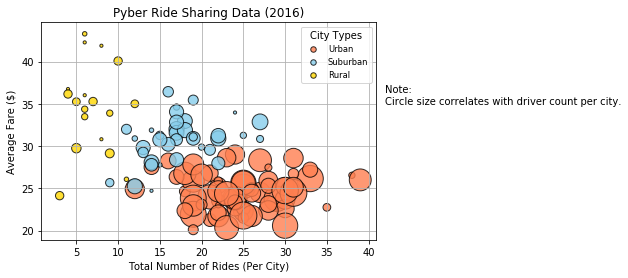

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

In [45]:
 # Calculate Ride Percents
urban_fares = round(combined_data[combined_data['type'] == "Urban"].sum()['fare']  
                    /  combined_data['fare'].sum() * 100,1)

suburban_fares = round(combined_data[combined_data['type'] == "Suburban"].sum()['fare']  
                    /  combined_data['fare'].sum() * 100,1)

rural_fares = round(combined_data[combined_data['type'] == "Rural"].sum()['fare']  
                    /  combined_data['fare'].sum() * 100,1)

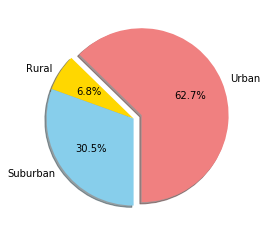

In [46]:
# Build Pie Chart
# Data to plot
labels = ['Urban',  'Rural', 'Suburban']
faresizes = [urban_fares, rural_fares, suburban_fares]
colors = [ 'lightcoral', 'gold', 'skyblue']
explode = (0.1, 0, 0)  # explode 1st slice
#title = 'Total fares by City Type'

# Plot
plt.pie(faresizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=270
       )
#plt.axis('equal')
plt.title = ('Total fares by City Type')
plt.suptitle = ('Total fares by City Type')


In [ ]:
# Save Figure
plt.savefig('total_fares.png')

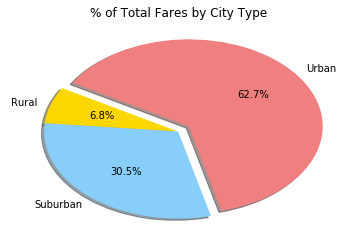

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

In [8]:
# Calculate Ride Percents
urban_rides = round(combined_data[combined_data['type'] == "Urban"].count()['type']  
                    /  combined_data['ride_id'].count() * 100,1)

suburban_rides = round(combined_data[combined_data['type'] == "Suburban"].count()['type']  
                    /  combined_data['ride_id'].count() * 100,1)

rural_rides = round(combined_data[combined_data['type'] == "Rural"].count()['type']  
                    /  combined_data['ride_id'].count() * 100,1)

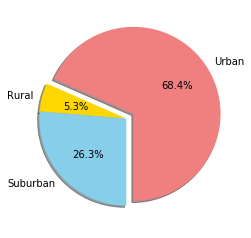

In [33]:
# Data to plot
labels = ['Urban',  'Rural', 'Suburban']
sizes = [urban_rides, rural_rides, suburban_rides]
colors = [ 'lightcoral', 'gold', 'skyblue']
explode = (0.1, 0, 0)  # explode 1st slice
#title = 'Total Rides by City Type'

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=270
       )
#plt.axis('equal')
plt.title = ('Total Rides by City Type')
plt.suptitle = ('Total Rides by City Type')

# Get instance of Axis3D
fig = plt.figure()
ax = fig.gca(projection="3d")
 
# Get current rotation angle
#print ax.azim
 
# Set rotation angle to 30 degrees
ax.view_init(azim=30)

In [ ]:
# Save and show
plt.savefig('total_rides.png')

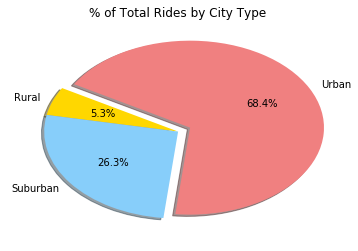

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure
plt.savefig('total_drivers.png')

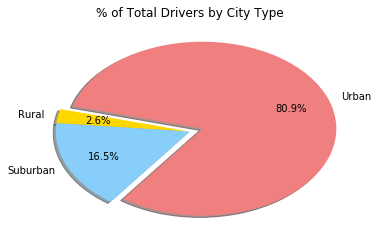

In [6]:
# Show Figure
plt.show()